## Importing dataset

In [1]:
import pandas as pd
dataset = pd.read_csv('Static_dataset.csv')

## Dataset Distribution

<function matplotlib.pyplot.show(close=None, block=None)>

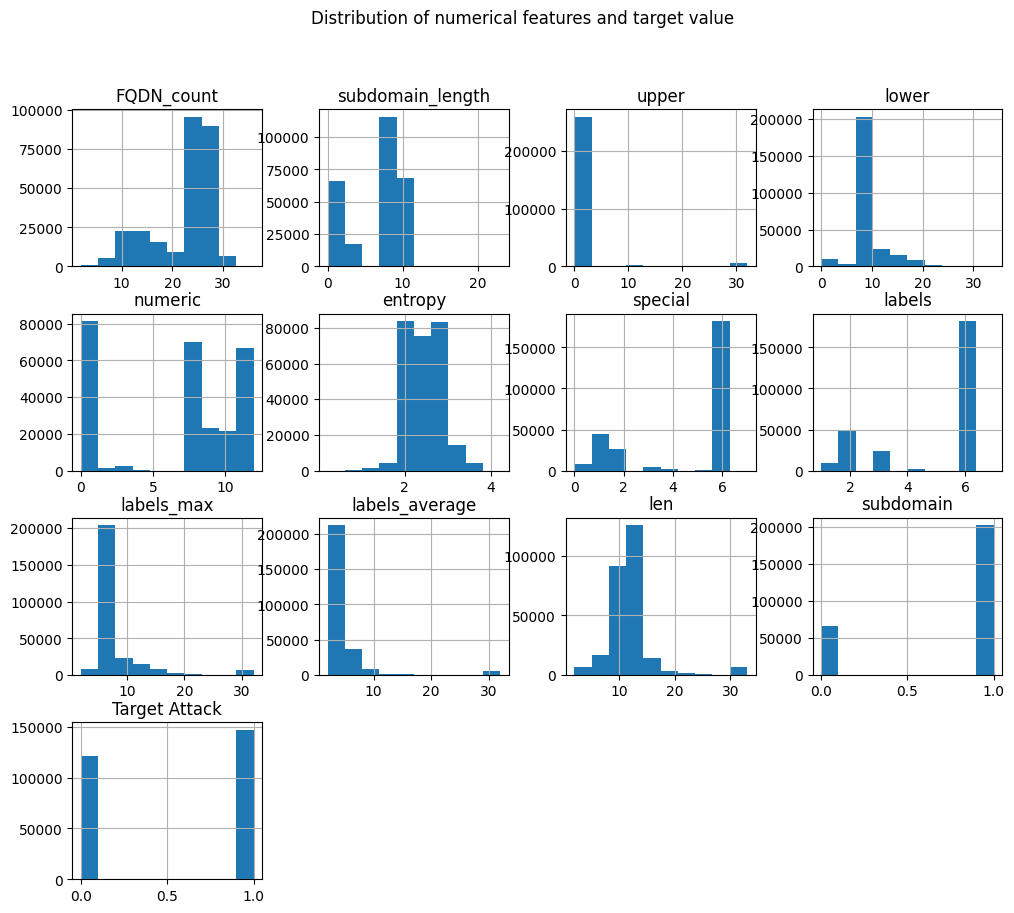

In [2]:
import matplotlib.pyplot as plt
num_data = dataset.select_dtypes(include=['float64','int64'])
num_data.hist(figsize=(12, 10))
plt.suptitle("Distribution of numerical features and target value")
plt.show

## Validating if we have any type of data skewed pattern and applying Box-Cox transformation

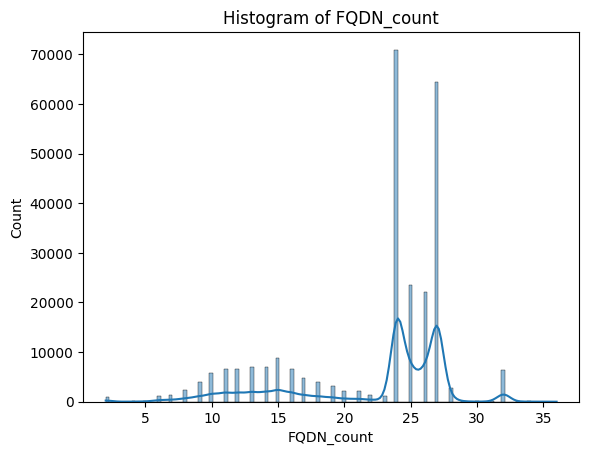

Skewness of FQDN_count: -1.1017243452283016


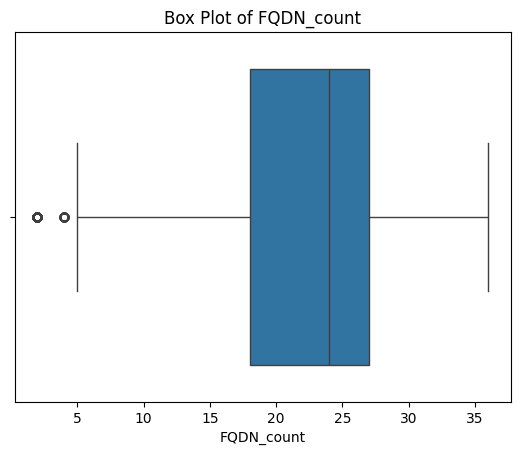

FQDN_count is skewed. Applying Log Transformation


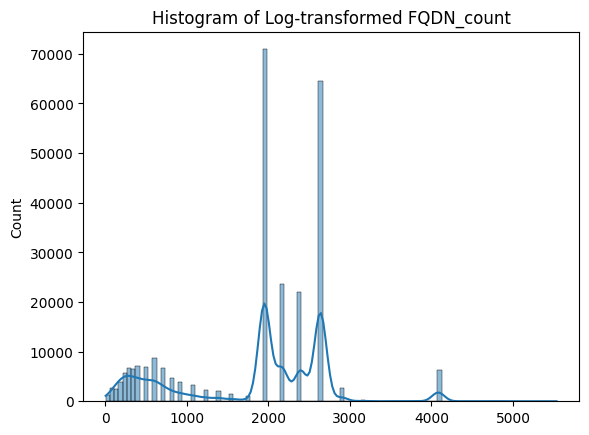

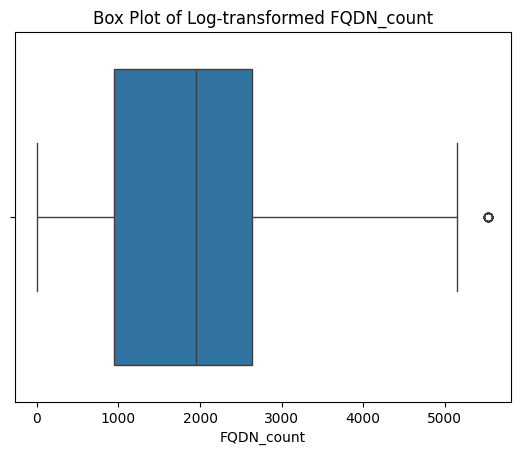

Skewness of FQDN_count after transformation: -0.3722645949792463


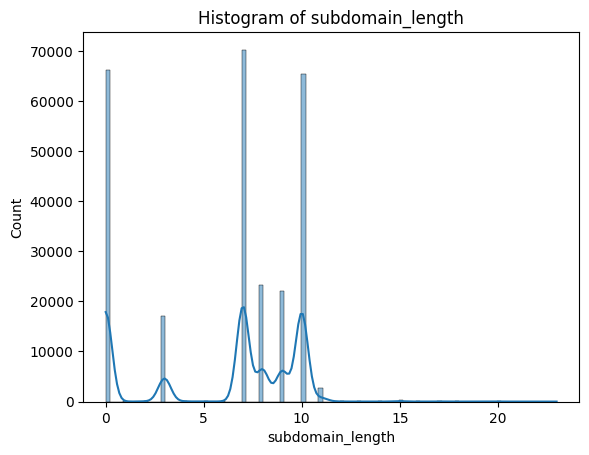

Skewness of subdomain_length: -0.5904771524409825


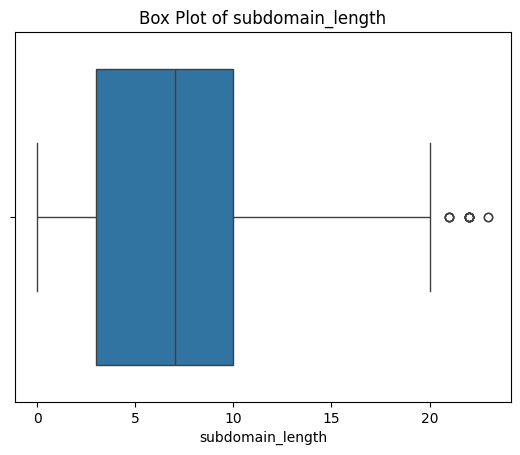

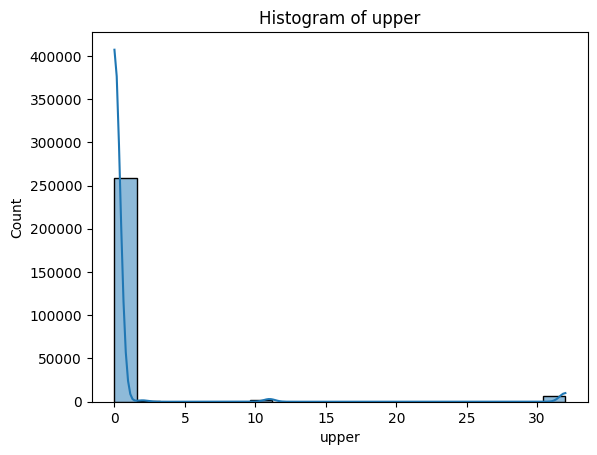

Skewness of upper: 5.988703404053554


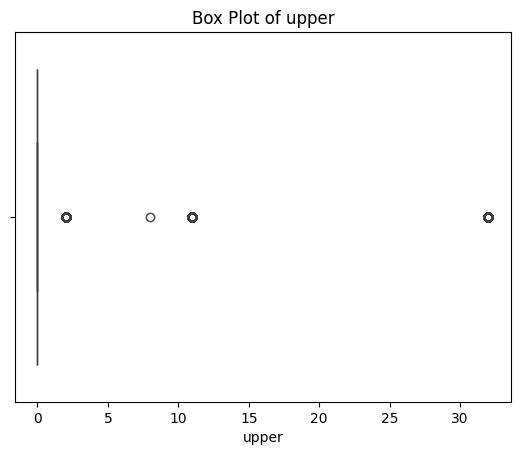

upper is skewed. Applying Log Transformation


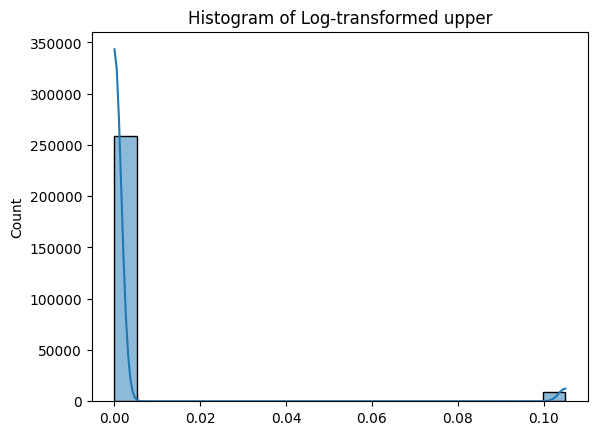

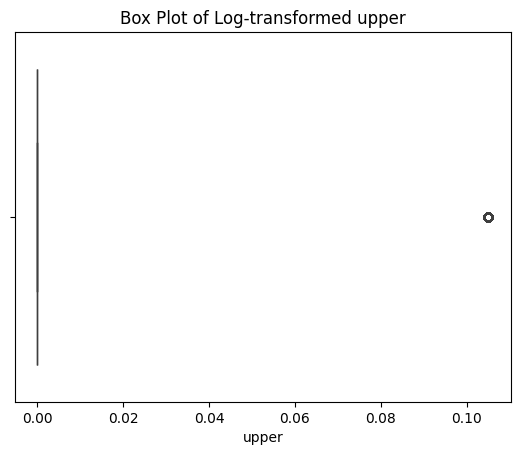

Skewness of upper after transformation: 5.080821067123238


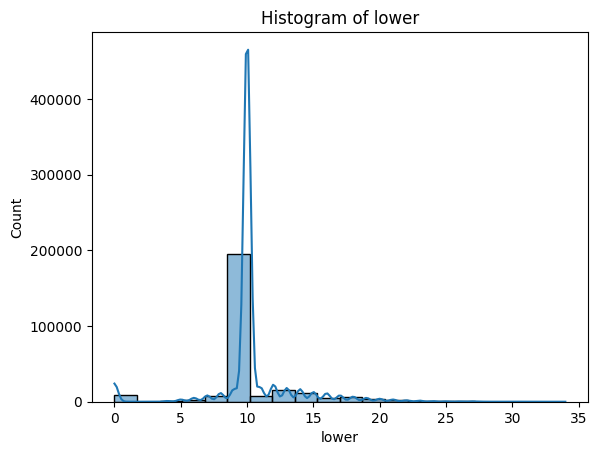

Skewness of lower: 0.34344697791783296


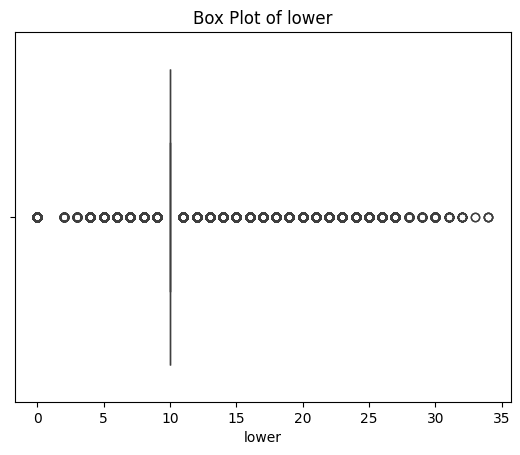

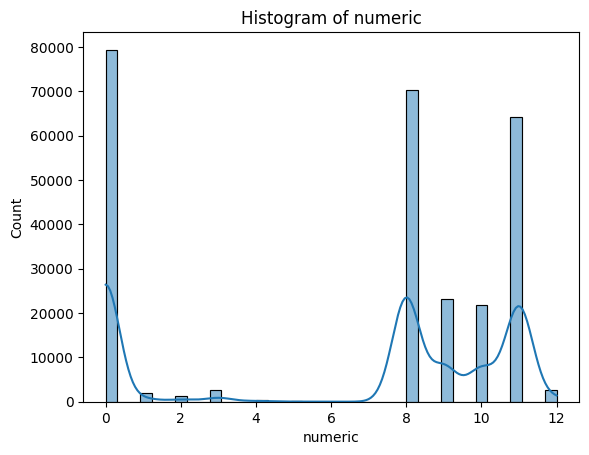

Skewness of numeric: -0.5943811107173629


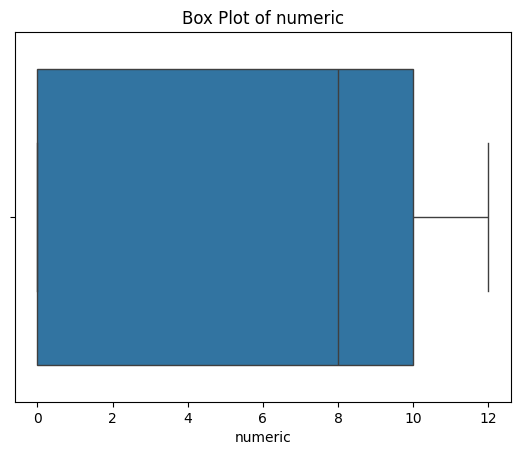

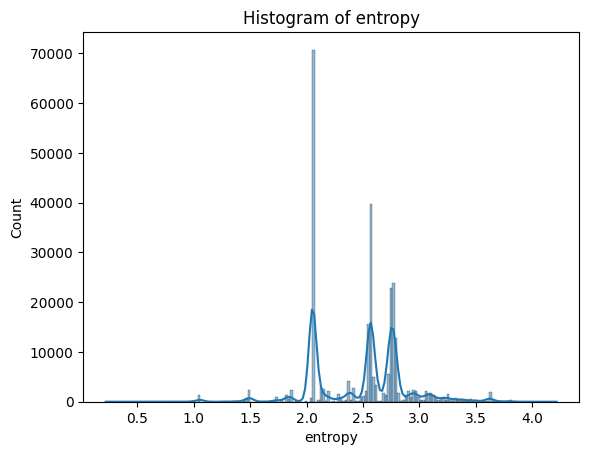

Skewness of entropy: -0.1401554311336809


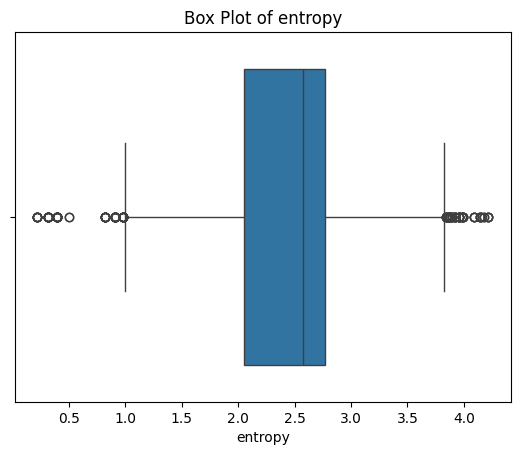

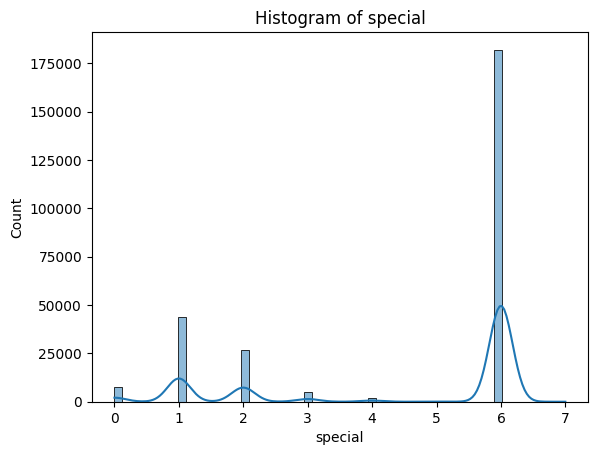

Skewness of special: -0.9029668990772131


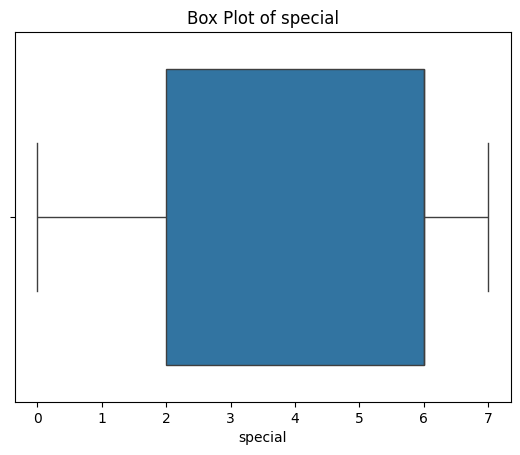

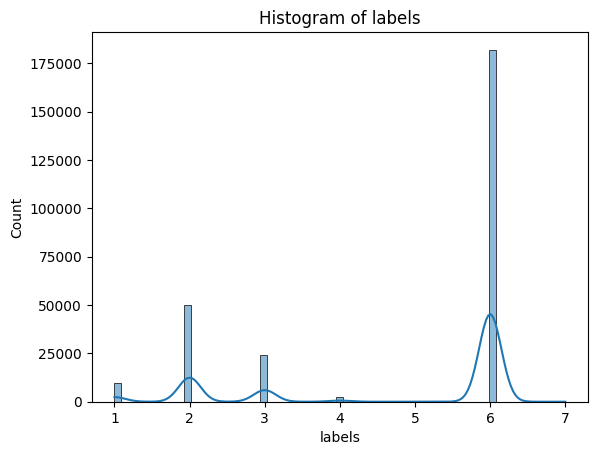

Skewness of labels: -0.9036752955308692


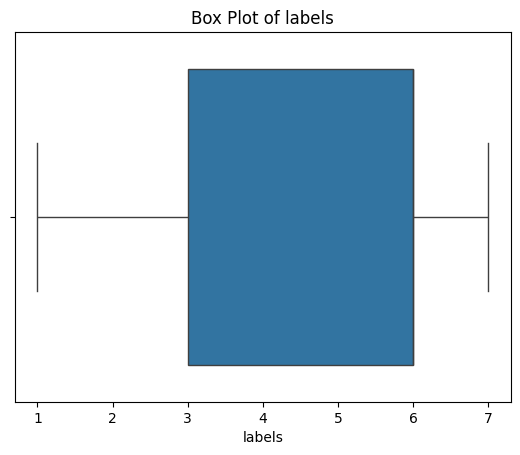

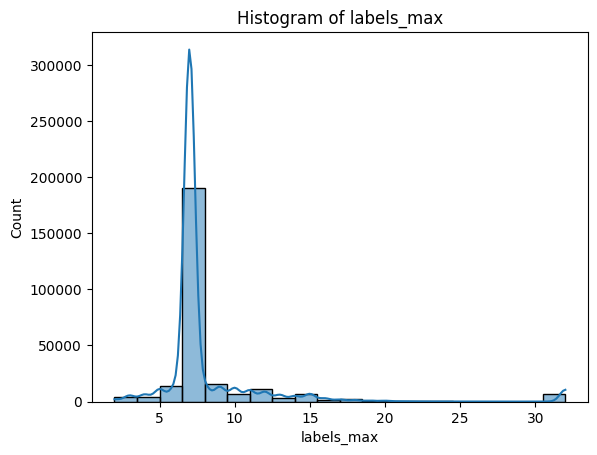

Skewness of labels_max: 3.9798872607768083


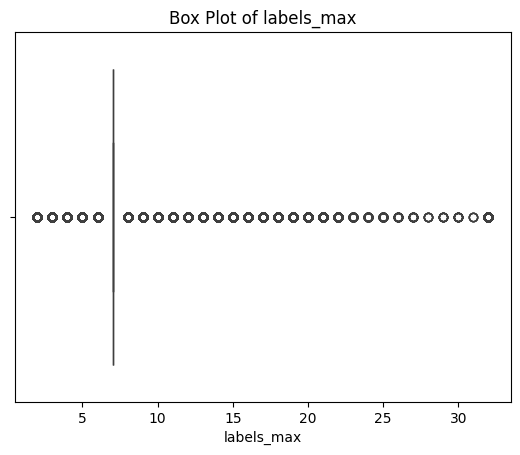

labels_max is skewed. Applying Log Transformation


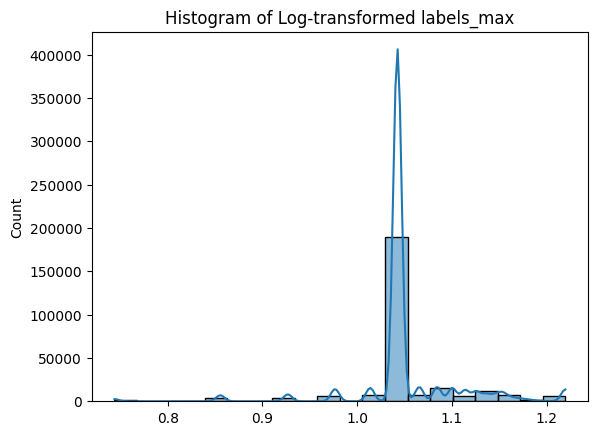

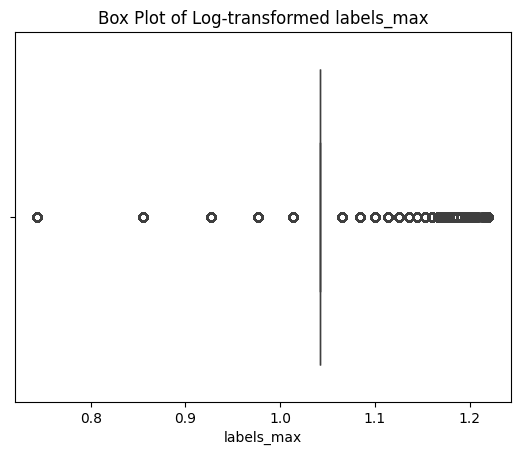

Skewness of labels_max after transformation: -0.4244245670216816


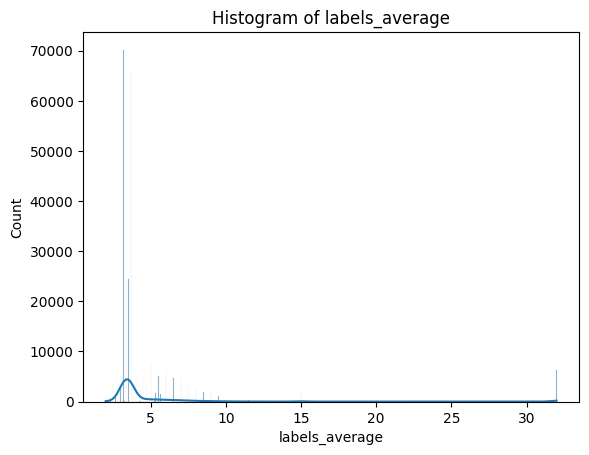

Skewness of labels_average: 5.087052869229152


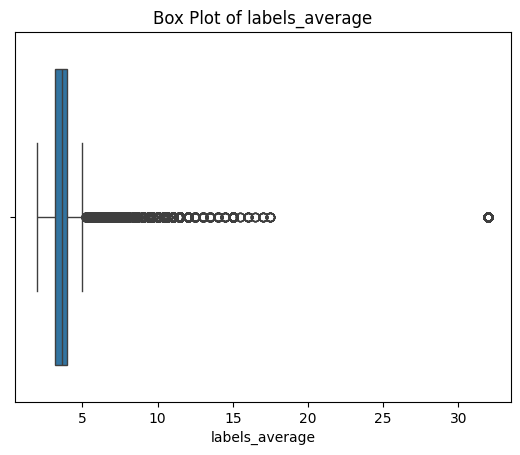

labels_average is skewed. Applying Log Transformation


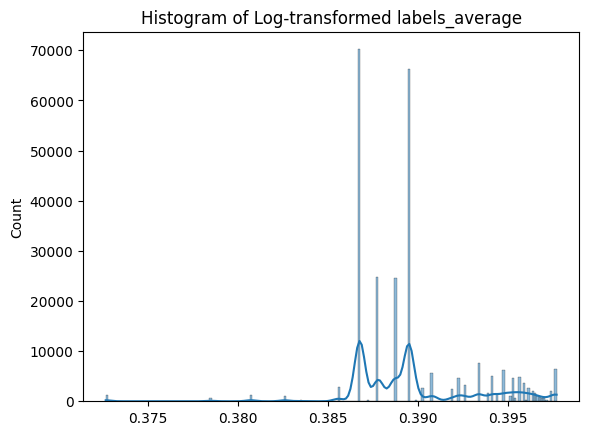

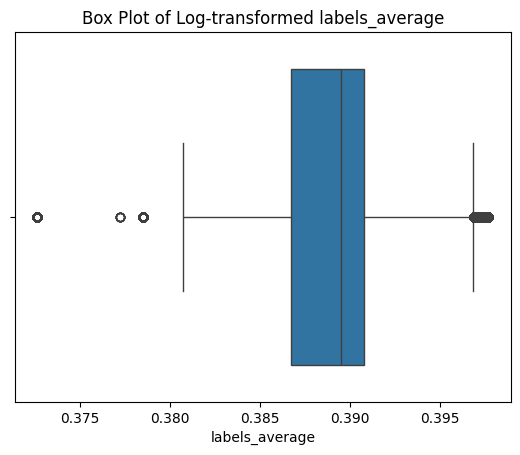

Skewness of labels_average after transformation: 0.18998943329372106


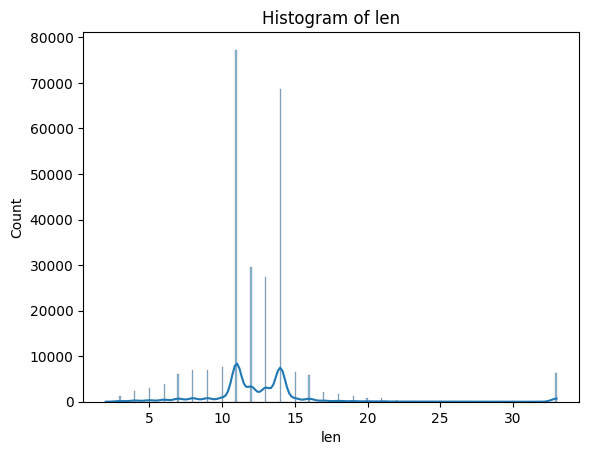

Skewness of len: 2.634786307274239


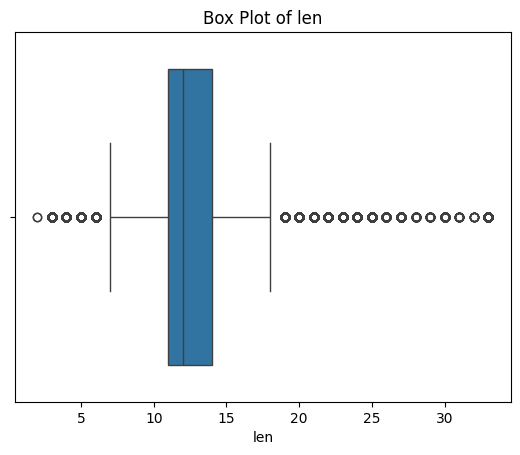

len is skewed. Applying Log Transformation


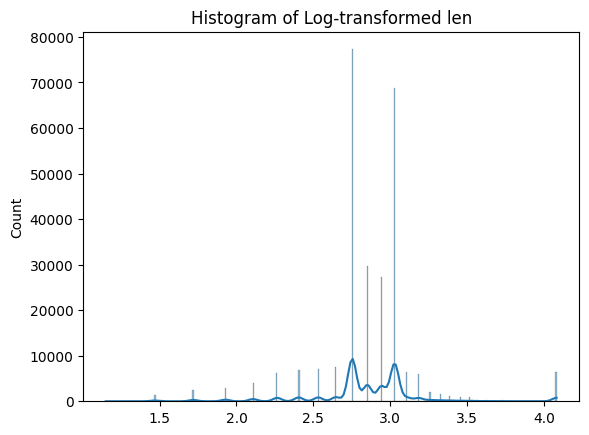

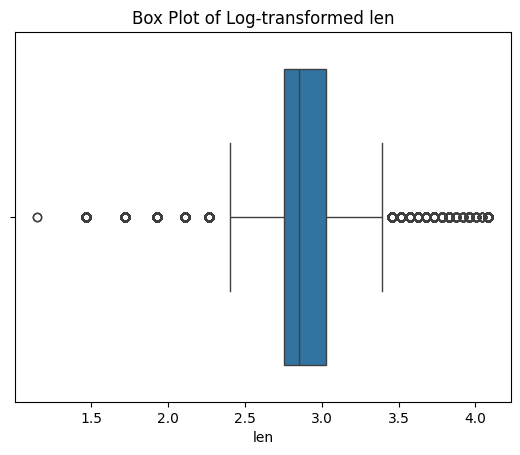

Skewness of len after transformation: 0.037225019997961836


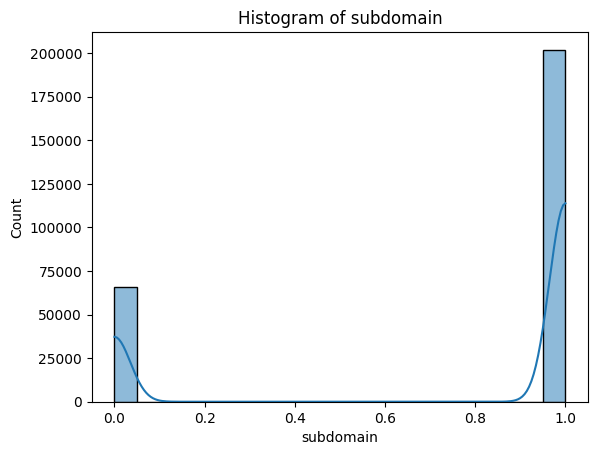

Skewness of subdomain: -1.1763900441443884


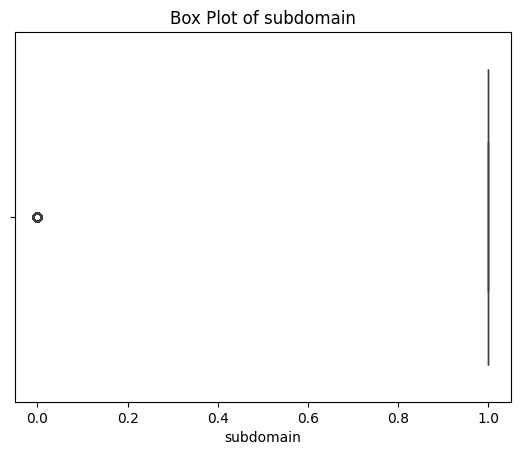

subdomain is skewed. Applying Log Transformation


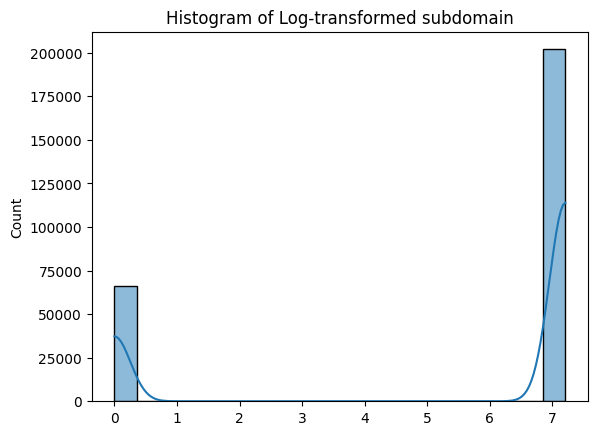

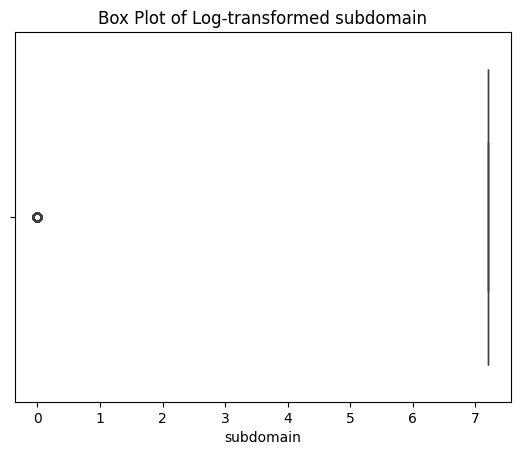

Skewness of subdomain after transformation: -1.176390044144388


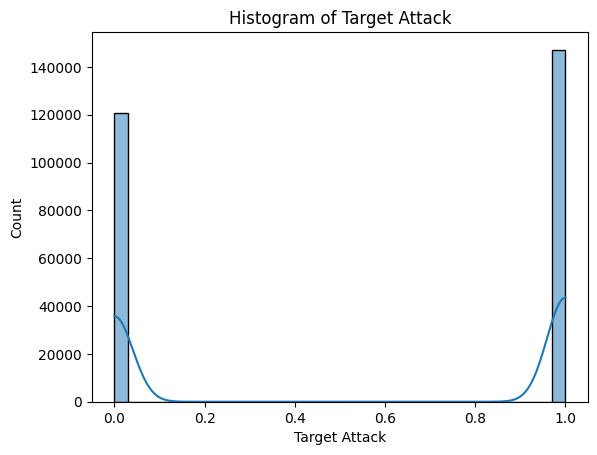

Skewness of Target Attack: -0.19704452163362654


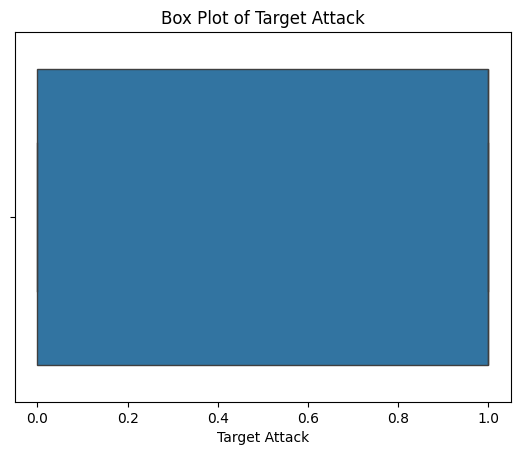

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import skew, boxcox

# List of features to check for skewness
features_to_check = dataset.select_dtypes(include=['float64', 'int64'])

# Loop through each feature
for feature in features_to_check:
    # Plot histogram
    sns.histplot(dataset[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.show()

    # Calculate skewness
    skewness = skew(dataset[feature])
    print(f"Skewness of {feature}: {skewness}")

    # Box plot
    sns.boxplot(x=dataset[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()
    
    # Set a threshold for skewness
    skew_threshold = 1

    # Check if Box-Cox transformation is needed
    if skewness < -skew_threshold or skewness > skew_threshold:
        print(f"{feature} is skewed. Applying Log Transformation")

        # Perform log transformation
        # transformed_feature = np.log1p(dataset[feature])
        transformed_feature, _ = boxcox(dataset[feature] + 1)  # Adding 1 to handle zero and negative values
        

        # Plot histogram of the transformed feature
        sns.histplot(transformed_feature, kde=True)
        plt.title(f'Histogram of Log-transformed {feature}')
        plt.show()

        # Update the dataset with the transformed feature
        dataset[feature] = transformed_feature

        # Box plot of the transformed feature
        sns.boxplot(x=dataset[feature])
        plt.title(f'Box Plot of Log-transformed {feature}')
        plt.show()
        
        skewness = skew(dataset[feature])
        print(f"Skewness of {feature} after transformation: {skewness}")

# Now, your dataset contains log-transformed features for those with skewness less than -1 or more than 1.

## Droping timestamp column

In [4]:
columns = ['timestamp'] 

# Drop the specified columns
data = dataset.drop(columns=columns, axis=1)

## Defining a function for handling missing data

In [5]:
def missing_delete(data):
    data = data.dropna()
    return data

In [6]:
# before dropping missing data
print(f'datset before applying missing_delete func:\n{data.isnull().sum()}') 

clean_data = missing_delete(data)

# after dropping missing data
print(f'datset after applying missing-delete func:\n{clean_data.isnull().sum()}')

datset before applying missing_delete func:
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        8
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64
datset after applying missing-delete func:
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        0
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64


## Converting categorical features with cat_conv function using hashing method

In [7]:
def cat_conv(data):
    data.loc[:,'longest_word'] = data.loc[:,'longest_word'].apply(hash)
    data.loc[:,'sld'] = data.loc[:,'sld'].apply(hash)
    return data

clean_data = cat_conv(clean_data)

## Splitting dataset

In [8]:
from sklearn.model_selection import train_test_split
X = clean_data.iloc[:, :-1]
y = clean_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(201049, 14)
(67017, 14)
(201049,)
(67017,)


## Feature selection with feature_selection function

In [10]:
# Before using feature_selection1
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(201049, 14)
(67017, 14)
(201049,)
(67017,)


### Feature selection 1

In [11]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np
def feature_selection1(X_train, X_test, p=0.6):
    sel = VarianceThreshold(threshold=(p * (1 - p)))
    X_train_1 = sel.fit_transform(X_train)
    X_test_1 = sel.transform(X_test)
    # Get the mask of selected features
    selected_features_mask = sel.get_support()
    
    # Get the names of the selected features
    selected_feature_names_1 = X_train.columns[selected_features_mask]

    # Identify the indices of the dropped features
    dropped_features_mask = ~selected_features_mask
    dropped_feature_indices_1 = np.where(dropped_features_mask)[0]

    return X_train_1, X_test_1, selected_feature_names_1, dropped_feature_indices_1

In [12]:
X_train_1, X_test_1, selected_feature_names_1, dropped_feature_indices_1 = feature_selection1(X_train, X_test)
print(dropped_feature_indices_1)

[ 2  5  8  9 12]


In [13]:
# after using feature_selection1
print(X_train_1.shape)
print(X_test_1.shape)
print(y_train.shape)
print(y_test.shape)

(201049, 9)
(67017, 9)
(201049,)
(67017,)


### Feature selection 2

In [14]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
feature_names= ['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric', 'entropy', 'special', 'labels',
                'labels_max', 'labels_average', 'longest_word', 'sld', 'len', 'subdomain']
def feature_selection2(X_train, X_test):
     lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train, y_train)
     model = SelectFromModel(lsvc, prefit=True)
     X_train_2 = model.transform(X_train)
     X_test_2 = model.transform(X_test)
     # Get the indices of the selected features
     selected_feature_indices = model.get_support(indices=True)
    
     # Get the names of the selected features
     selected_feature_names_2 = [feature_names[i] for i in selected_feature_indices]
    

     all_feature_indices = range(X_train_2.shape[1])
     dropped_feature_indices_2 = list(set(all_feature_indices) - set(selected_feature_indices))
    
     return X_train_2, X_test_2, selected_feature_names_2, dropped_feature_indices_2

In [15]:
X_train_2, X_test_2, selected_feature_names_2, dropped_feature_indices_2 = feature_selection2(X_train, X_test)
print(dropped_feature_indices_2)

C:\ProgramData\anaconda3\envs\online\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\anaconda3\envs\online\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\envs\online\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


[9, 10]


In [16]:
print(X_train_2.shape)
print(X_test_2.shape)
print(y_train.shape)
print(y_test.shape)

(201049, 11)
(67017, 11)
(201049,)
(67017,)


### Feature selection 3

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

def feature_selection3(X_train, X_test):
    clf = ExtraTreesClassifier(n_estimators=50)
    clf.fit(X_train, y_train)
    model = SelectFromModel(clf, prefit=True)
    X_train_3 = model.transform(X_train)
    X_test_3 = model.transform(X_test)
    selected_feature_indices = model.get_support(indices=True)
    all_feature_indices = range(X_train_3.shape[1])
    selected_feature_names_3 = X_train.columns[selected_feature_indices]
    dropped_feature_indices_3 = list(set(all_feature_indices) - set(selected_feature_indices))
    return X_train_3, X_test_3, selected_feature_names_3, dropped_feature_indices_3

In [18]:
X_train_3, X_test_3, selected_feature_names_3, dropped_feature_indices_3 = feature_selection3(X_train, X_test)
print(dropped_feature_indices_3)

C:\ProgramData\anaconda3\envs\online\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


[1, 2, 3]


C:\ProgramData\anaconda3\envs\online\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [19]:
print(X_train_3.shape)
print(X_test_3.shape)
print(y_train.shape)
print(y_test.shape)

(201049, 5)
(67017, 5)
(201049,)
(67017,)


### Feature selection 4

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier(n_estimators=100, random_state=42)
feature_names= ['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric', 'entropy', 'special', 'labels',
                'labels_max', 'labels_average', 'longest_word', 'sld', 'len', 'subdomain']
def feature_selection4(X_train, X_test):
    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Display feature importances
    feature_importances = clf.feature_importances_

    # Use SelectFromModel to select features based on importance scores
    sfm = SelectFromModel(clf, threshold=0.05)  # You can adjust the threshold as needed
    sfm.fit(X_train, y_train)

    # Transform the original features to get the selected features
    X_train_4 = sfm.transform(X_train)
    X_test_4 = sfm.transform(X_test)
    selected_feature_indices = sfm.get_support(indices=True)
    selected_feature_names_4 = [feature_names[i] for i in selected_feature_indices]
    all_feature_indices = range(X_train_4.shape[1])
    dropped_feature_indices_4 = list(set(all_feature_indices) - set(selected_feature_indices))
    return X_train_4, X_test_4, selected_feature_names_4, dropped_feature_indices_4

In [21]:
X_train_4, X_test_4, selected_feature_names_4, dropped_feature_indices_4 = feature_selection4(X_train, X_test)
print(dropped_feature_indices_4)

[2, 5]


In [22]:
print(X_train_4.shape)
print(X_test_4.shape)
print(y_train.shape)
print(y_test.shape)

(201049, 7)
(67017, 7)
(201049,)
(67017,)


## Check if data is imbalanced

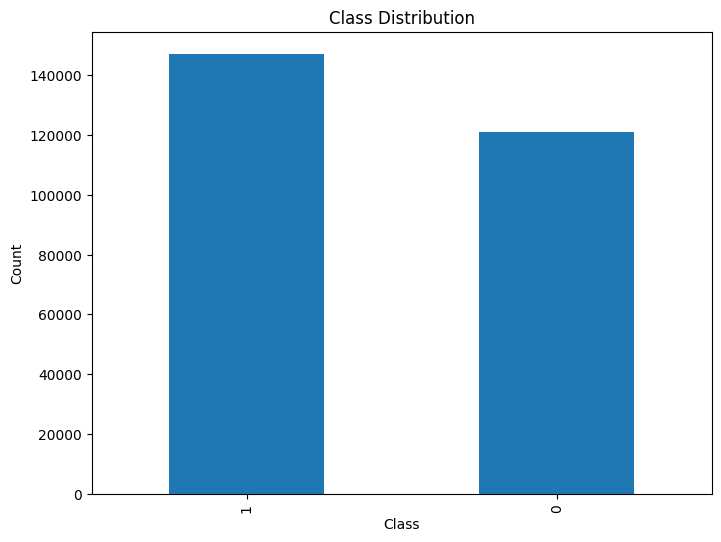

Class Counts:
Target Attack
1    147179
0    120887
Name: count, dtype: int64
Imbalance Ratio: 0.82


In [23]:
class_counts = clean_data['Target Attack'].value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

imbalance_ratio = class_counts.min() / class_counts.max()

print("Class Counts:")
print(class_counts)
print("Imbalance Ratio: {:.2f}".format(imbalance_ratio))

## Defining balancing func

In [24]:
print(X_train.shape)
print(y_train.shape)

(201049, 14)
(201049,)


In [25]:
from imblearn.over_sampling import SMOTE

def balancing(X_train, y_train):
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    y_train = pd.Series(y_train)
    return X_train, y_train

## Feature scaling

In [26]:
from sklearn.preprocessing import StandardScaler
def sc(X_train, X_test):
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test

In [27]:
X_train, X_test = sc(X_train, X_test)

## HyperParameter tuning

In [28]:
from sklearn.model_selection import GridSearchCV

def HyperP_tuning(model, HyperParameters, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=HyperParameters, cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    return best_model, best_params

In [29]:
X_train.shape

(201049, 14)

In [30]:
y_train.shape

(201049,)

## Definig static func

In [31]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
def static(dataset, model, missing_delete, cat_conv,feature_selection, balancing, sc, HyperP_tuning, HyperParameters):
    columns = ['timestamp'] 
    dataset = dataset.drop(columns=columns, axis=1)
    dataset = missing_delete(dataset)
    dataset = cat_conv(dataset)
    X = dataset.iloc[:, :-1]
    y = dataset.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    X_train, X_test, selected_feature_names, dropped_feature_indices = feature_selection(X_train, X_test)
    X_train, y_train = balancing(X_train, y_train)
    X_train, X_test = sc(X_train, X_test)
    best_model, best_params = HyperP_tuning(model, HyperParameters, X_train, y_train)
    y_pred = best_model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    return best_model, best_params, f1, precision, recall

## Model1  = RandomForestClassifier 

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

In [33]:
parameters =  {
    'n_estimators': [10, 200], 
    'max_depth': [10,20,30], 
    'min_samples_split': [2, 5, 10] 
}
best_model1_1,best_params1_1, f1_1, precision1_1, recall1_1 = static(dataset = dataset,
       model=rf,
       missing_delete= missing_delete,
       cat_conv=cat_conv,
       feature_selection=feature_selection1,
       balancing=balancing,
       sc=sc,
       HyperP_tuning=HyperP_tuning,
       HyperParameters=parameters)

print(f1_1, precision1_1, recall1_1, best_params1_1)

0.861056843591856 0.7561389003720546 0.9997813610276032 {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [34]:
parameters =  {
    'n_estimators': [10, 200], 
    'max_depth': [10,20,30], 
    'min_samples_split': [2, 5, 10] 
}
best_model1_2,best_params1_2, f1_2, precision1_2, recall1_2 = static(dataset = dataset,
       model=rf,
       missing_delete= missing_delete,
       cat_conv=cat_conv,
       feature_selection=feature_selection2,
       balancing=balancing,
       sc=sc,
       HyperP_tuning=HyperP_tuning,
       HyperParameters=parameters)


print(f1_2, precision1_2, recall1_2, best_params1_2)

C:\ProgramData\anaconda3\envs\online\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\anaconda3\envs\online\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\envs\online\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


0.8609594200169476 0.7560668072264253 0.9996447116698551 {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [35]:
parameters =  {
    'n_estimators': [10, 200], 
    'max_depth': [10,20,30], 
    'min_samples_split': [2, 5, 10] 
}
best_model1_3,best_params1_3, f1_3, precision1_3, recall1_3 = static(dataset = dataset,
       model=rf,
       missing_delete= missing_delete,
       cat_conv=cat_conv,
       feature_selection=feature_selection3,
       balancing=balancing,
       sc=sc,
       HyperP_tuning=HyperP_tuning,
       HyperParameters=parameters)


print(f1_3, precision1_3, recall1_3, best_params1_3)

C:\ProgramData\anaconda3\envs\online\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\envs\online\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


0.8606846863816162 0.7559870951730984 0.9990434544957638 {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [36]:
parameters =  {
    'n_estimators': [10, 200], 
    'max_depth': [10,20,30], 
    'min_samples_split': [2, 5, 10] 
}
best_model1_4,best_params1_4, f1_4, precision1_4, recall1_4 = static(dataset = dataset,
       model=rf,
       missing_delete= missing_delete,
       cat_conv=cat_conv,
       feature_selection=feature_selection4,
       balancing=balancing,
       sc=sc,
       HyperP_tuning=HyperP_tuning,
       HyperParameters=parameters)


print(f1_4, precision1_4, recall1_4, best_params1_4)

0.8606846863816162 0.7559870951730984 0.9990434544957638 {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


## Model2 = XGBoost

In [37]:
from xgboost import XGBClassifier 
xgb = XGBClassifier()

In [38]:
n_estimators = [2, 10, 20] 
max_depth = [2, 3, 5, 10, 15] 
learning_rate=[0.05,0.1,0.15,0.20] 
min_child_weight=[1,2,3,4] 
booster=['gbtree','gblinear'] 
base_score=[0.25,0.5,0.75,1] 

parameters = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

best_model2_1,best_params2_1, f2_1, precision2_1, recall2_1 = static(dataset=dataset,
       model=xgb,
       missing_delete= missing_delete,
       cat_conv=cat_conv,
       feature_selection=feature_selection1,
       balancing=balancing,
       sc=sc,
       HyperP_tuning=HyperP_tuning,
       HyperParameters=parameters)

print(f2_1, precision2_1, recall2_1, best_params2_1)

0.8609862304342709 0.7560768912773873 0.9996993714129544 {'base_score': 0.25, 'booster': 'gbtree', 'learning_rate': 0.15, 'max_depth': 10, 'min_child_weight': 2, 'n_estimators': 20}


In [39]:
n_estimators = [2, 10, 20] 
max_depth = [2, 3, 5, 10, 15] 
learning_rate=[0.05,0.1,0.15,0.20] 
min_child_weight=[1,2,3,4] 
booster=['gbtree','gblinear'] 
base_score=[0.25,0.5,0.75,1] 

parameters = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

best_model2_2,best_params2_2, f2_2, precision2_2, recall2_2 = static(dataset=dataset,
       model=xgb,
       missing_delete= missing_delete,
       cat_conv=cat_conv,
       feature_selection=feature_selection2,
       balancing=balancing,
       sc=sc,
       HyperP_tuning=HyperP_tuning,
       HyperParameters=parameters)

print(f2_2, precision2_2, recall2_2, best_params2_2)

C:\ProgramData\anaconda3\envs\online\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\anaconda3\envs\online\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\envs\online\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


0.8609525602852737 0.7560405944482338 0.9996720415414048 {'base_score': 0.25, 'booster': 'gbtree', 'learning_rate': 0.15, 'max_depth': 10, 'min_child_weight': 2, 'n_estimators': 20}


In [40]:
n_estimators = [2, 10, 20] 
max_depth = [2, 3, 5, 10, 15] 
learning_rate=[0.05,0.1,0.15,0.20] 
min_child_weight=[1,2,3,4] 
booster=['gbtree','gblinear'] 
base_score=[0.25,0.5,0.75,1] 


parameters = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

best_model2_3,best_params2_3, f2_3, precision2_3, recall2_3 = static(dataset=dataset,
       model=xgb,
       missing_delete= missing_delete,
       cat_conv=cat_conv,
       feature_selection=feature_selection3,
       balancing=balancing,
       sc=sc,
       HyperP_tuning=HyperP_tuning,
       HyperParameters=parameters)

print(f2_3, precision2_3, recall2_3, best_params2_3)

C:\ProgramData\anaconda3\envs\online\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\envs\online\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


0.860661721417638 0.7560612329333884 0.9988521453949166 {'base_score': 0.25, 'booster': 'gbtree', 'learning_rate': 0.15, 'max_depth': 10, 'min_child_weight': 2, 'n_estimators': 20}


In [41]:
n_estimators = [2, 10, 20] 
max_depth = [2, 3, 5, 10, 15] 
learning_rate=[0.05,0.1,0.15,0.20] 
min_child_weight=[1,2,3,4] 
booster=['gbtree','gblinear'] 
base_score=[0.25,0.5,0.75,1] 


parameters = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

best_model2_4,best_params2_4, f2_4, precision2_4, recall2_4 = static(dataset=dataset,
       model=xgb,
       missing_delete= missing_delete,
       cat_conv=cat_conv,
       feature_selection=feature_selection4,
       balancing=balancing,
       sc=sc,
       HyperP_tuning=HyperP_tuning,
       HyperParameters=parameters)

print(f2_4, precision2_4, recall2_4, best_params2_4)

0.860691538832837 0.7560133192695084 0.9990161246242143 {'base_score': 0.25, 'booster': 'gbtree', 'learning_rate': 0.15, 'max_depth': 10, 'min_child_weight': 2, 'n_estimators': 20}


## Model3 = SGDClassifier

In [42]:
from sklearn import linear_model
sgd = linear_model.SGDClassifier()

In [43]:
parameters = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],  
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1], 
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
}
best_model3_1,best_params3_1, f3_1, precision3_1, recall3_1 = static(dataset=dataset,
       model=sgd,
       missing_delete= missing_delete,
       cat_conv=cat_conv,
       feature_selection=feature_selection1,
       balancing=balancing,
       sc=sc,
       HyperP_tuning=HyperP_tuning,
       HyperParameters=parameters)

print(f3_1, precision3_1, recall3_1, best_params3_1)

0.8589991510234883 0.7554232859098262 0.9954905711943154 {'alpha': 0.001, 'l1_ratio': 1, 'learning_rate': 'optimal'}


In [44]:
parameters = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],  
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1], 
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
}
best_model3_2,best_params3_2, f3_2, precision3_2, recall3_2 = static(dataset=dataset,
       model=sgd,
       missing_delete= missing_delete,
       cat_conv=cat_conv,
       feature_selection=feature_selection2,
       balancing=balancing,
       sc=sc,
       HyperP_tuning=HyperP_tuning,
       HyperParameters=parameters)

print(f3_2, precision3_2, recall3_2, best_params3_2)

C:\ProgramData\anaconda3\envs\online\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\anaconda3\envs\online\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\envs\online\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


0.8595841976239863 0.7556674541008744 0.9966384257993988 {'alpha': 0.001, 'l1_ratio': 1, 'learning_rate': 'optimal'}


In [45]:
parameters = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],  
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1], 
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
}
best_model3_3,best_params3_3, f3_3, precision3_3, recall3_3 = static(dataset=dataset,
       model=sgd,
       missing_delete= missing_delete,
       cat_conv=cat_conv,
       feature_selection=feature_selection3,
       balancing=balancing,
       sc=sc,
       HyperP_tuning=HyperP_tuning,
       HyperParameters=parameters)

print(f3_3, precision3_3, recall3_3, best_params3_3)

C:\ProgramData\anaconda3\envs\online\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\envs\online\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


0.8375743394754802 0.7558175339814367 0.9391637059305821 {'alpha': 0.001, 'l1_ratio': 1, 'learning_rate': 'optimal'}


In [51]:
parameters = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],  
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1], 
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
}
best_model3_4,best_params3_4, f3_4, precision3_4, recall3_4 = static(dataset=dataset,
       model=sgd,
       missing_delete= missing_delete,
       cat_conv=cat_conv,
       feature_selection=feature_selection4,
       balancing=balancing,
       sc=sc,
       HyperP_tuning=HyperP_tuning,
       HyperParameters=parameters)

print(f3_4, precision3_4, recall3_4, best_params3_4)

0.856936775017441 0.7552156061774452 0.9903252254714403 {'alpha': 0.001, 'l1_ratio': 1, 'learning_rate': 'optimal'}


## Model4 = PassiveAggressiveClassifier

In [52]:
from sklearn import linear_model
pac = linear_model.PassiveAggressiveClassifier()

In [53]:
parameters = {
    'C': [0.01, 0.1, 1.0],
    'fit_intercept': [True, False], 
    'max_iter': [100, 200, 300] 
}
best_model4_1,best_params4_1, f4_1, precision4_1, recall4_1 = static(dataset=dataset,
       model=pac,
       missing_delete= missing_delete,
       cat_conv=cat_conv,
       feature_selection=feature_selection1,
       balancing=balancing,
       sc=sc,
       HyperP_tuning=HyperP_tuning,
       HyperParameters=parameters)

print(f4_1, precision4_1, recall4_1, best_params4_1)

0.8507146325000889 0.7505589335339226 0.9817163159333151 {'C': 1.0, 'fit_intercept': False, 'max_iter': 300}


In [54]:
parameters = {
    'C': [0.01, 0.1, 1.0],
    'fit_intercept': [True, False], 
    'max_iter': [100, 200, 300] 
}
best_model4_2,best_params4_2, f4_2, precision4_2, recall4_2 = static(dataset=dataset,
       model=pac,
       missing_delete= missing_delete,
       cat_conv=cat_conv,
       feature_selection=feature_selection2,
       balancing=balancing,
       sc=sc,
       HyperP_tuning=HyperP_tuning,
       HyperParameters=parameters)

print(f4_2, precision4_2, recall4_2, best_params4_2)

C:\ProgramData\anaconda3\envs\online\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\anaconda3\envs\online\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\envs\online\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


0.8594423888194952 0.7554482930062977 0.9966384257993988 {'C': 0.01, 'fit_intercept': False, 'max_iter': 200}


In [55]:
parameters = {
    'C': [0.01, 0.1, 1.0],
    'fit_intercept': [True, False], 
    'max_iter': [100, 200, 300] 
}
best_model4_3,best_params4_3, f4_3, precision4_3, recall4_3 = static(dataset=dataset,
       model=pac,
       missing_delete= missing_delete,
       cat_conv=cat_conv,
       feature_selection=feature_selection3,
       balancing=balancing,
       sc=sc,
       HyperP_tuning=HyperP_tuning,
       HyperParameters=parameters)

print(f4_3, precision4_3, recall4_3, best_params4_3)

C:\ProgramData\anaconda3\envs\online\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\envs\online\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


0.8421963442333347 0.751592629930718 0.9576386990981143 {'C': 0.1, 'fit_intercept': True, 'max_iter': 200}


In [56]:
parameters = {
    'C': [0.01, 0.1, 1.0],
    'fit_intercept': [True, False], 
    'max_iter': [100, 200, 300] 
}
best_model4_4,best_params4_4, f4_4, precision4_4, recall4_4 = static(dataset=dataset,
       model=pac,
       missing_delete= missing_delete,
       cat_conv=cat_conv,
       feature_selection=feature_selection4,
       balancing=balancing,
       sc=sc,
       HyperP_tuning=HyperP_tuning,
       HyperParameters=parameters)

print(f4_4, precision4_4, recall4_4, best_params4_4)

0.8570381144972268 0.7553730378770507 0.9903252254714403 {'C': 0.01, 'fit_intercept': True, 'max_iter': 100}


## Comparing Models

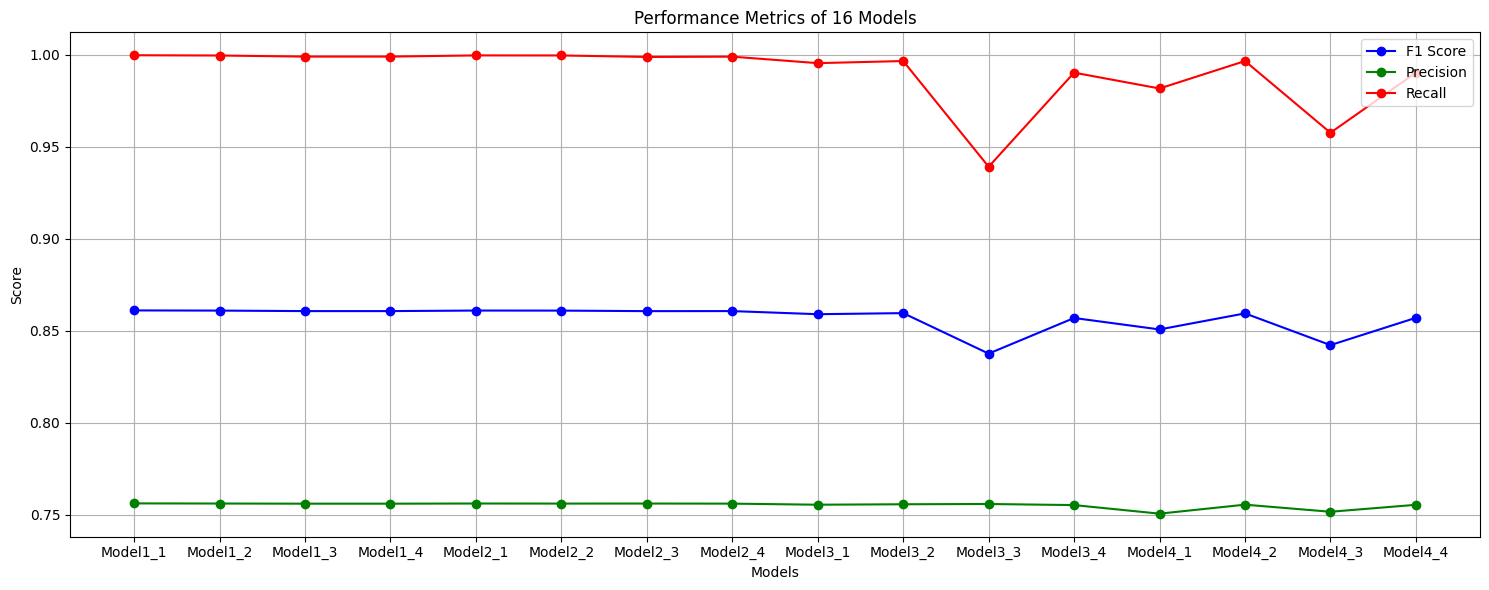

In [57]:
import matplotlib.pyplot as plt
import numpy as np

model_names = ['Model1_1', 'Model1_2', 'Model1_3', 'Model1_4',
               'Model2_1', 'Model2_2','Model2_3', 'Model2_4',
               'Model3_1', 'Model3_2', 'Model3_3', 'Model3_4',
               'Model4_1', 'Model4_2', 'Model4_3', 'Model4_4']
f1_scores = [f1_1, f1_2, f1_3, f1_4, f2_1, f2_2, f2_3, f2_4, f3_1, f3_2, f3_3, f3_4, f4_1, f4_2, f4_3, f4_4]
precision_scores = [precision1_1, precision1_2, precision1_3, precision1_4,
                    precision2_1, precision2_2, precision2_3, precision2_4,
                    precision3_1, precision3_2, precision3_3, precision3_4,
                    precision4_1, precision4_2, precision4_3, precision4_4]
recall_scores = [recall1_1, recall1_2, recall1_3, recall1_4,
                 recall2_1, recall2_2, recall2_3, recall2_4,
                 recall3_1, recall3_2, recall3_3, recall3_4,
                 recall4_1, recall4_2, recall4_3, recall4_4]


plt.figure(figsize=(15, 6))

# Plot F1 Score
plt.plot(model_names, f1_scores, marker='o', label='F1 Score', linestyle='-', color='blue')

# Plot Precision
plt.plot(model_names, precision_scores, marker='o', label='Precision', linestyle='-', color='green')

# Plot Recall
plt.plot(model_names, recall_scores, marker='o', label='Recall', linestyle='-', color='red')

# Customize the plot
plt.title('Performance Metrics of 16 Models')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


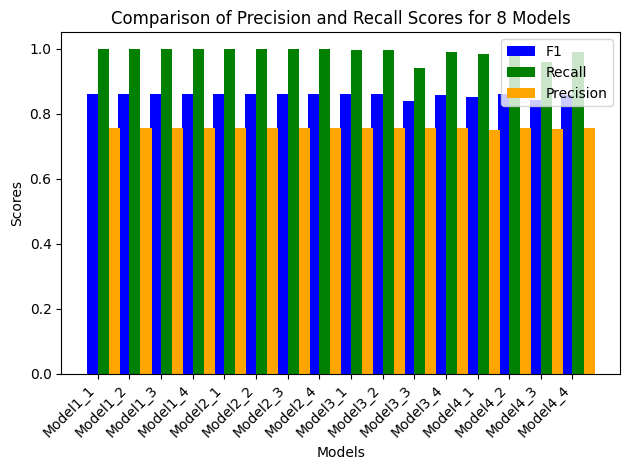

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Set up positions for the bar groups
bar_width = 0.35
index = np.arange(len(model_names))

# Plot F1 scores
plt.bar(index, f1_scores, bar_width, label='F1', color='blue')

# Plot Recall scores
plt.bar(index + bar_width, recall_scores, bar_width, label='Recall', color='green')

# Plot Precision scores
plt.bar(index + 2 * bar_width, precision_scores, bar_width, label='Precision', color='orange')

# Customize the plot
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Precision and Recall Scores for 8 Models')
plt.xticks(index + bar_width / 2, model_names, rotation=45, ha='right')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Best model

In [62]:
# Find the model with the maximum precision, recall, and F1 score
best_f1_model = model_names[np.argmax(f1_scores)]
best_precision_model = model_names[np.argmax(precision_scores)]
best_recall_model = model_names[np.argmax(recall_scores)]


# Print the results
print(f"Best F1 Score Model: {best_f1_model} (F1 Score: {max(f1_scores)})")
print(f"Best Precision Model: {best_precision_model} (Precision: {max(precision_scores)})")
print(f"Best Recall Model: {best_recall_model} (Recall: {max(recall_scores)})")

Best F1 Score Model: Model1_1 (F1 Score: 0.861056843591856)
Best Precision Model: Model1_1 (Precision: 0.7561389003720546)
Best Recall Model: Model1_1 (Recall: 0.9997813610276032)


In [63]:
static_model = best_model1_1
dropped_feature_indices = dropped_feature_indices_1
print(f'Best model is: {static_model}')
print(f"Dropped features' indices: {dropped_feature_indices_1}")

Best model is: RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=200,
                       random_state=0)
Dropped features' indices: [ 2  5  8  9 12]


## Best selected features

In [64]:
best_features = list(selected_feature_names_1)
best_features

['FQDN_count',
 'subdomain_length',
 'lower',
 'numeric',
 'special',
 'labels',
 'longest_word',
 'sld',
 'subdomain']

## Plotting the features importance for the final static model

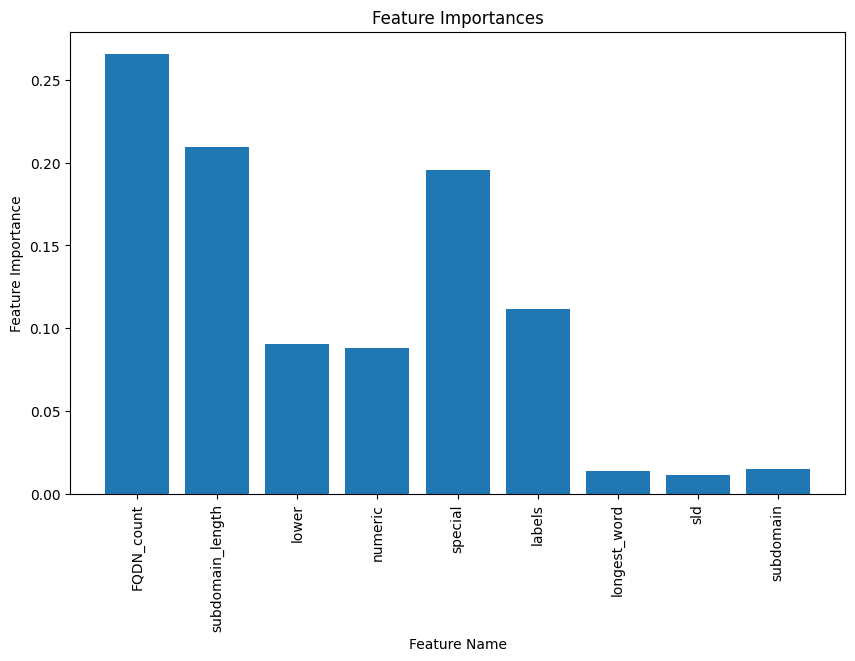

In [65]:
feature_importances = static_model.feature_importances_
feature_names = ['FQDN_count', 'subdomain_length', 'lower', 'numeric', 'special', 'labels', 'longest_word', 'sld', 'subdomain']

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, align="center")
plt.xticks(range(len(feature_importances)), feature_names, rotation='vertical')
plt.xlabel("Feature Name")
plt.ylabel("Feature Importance")
plt.title("Feature Importances")
plt.show()

## Saving the static_model

In [59]:
import pickle
pkl_filename = 'final_model_static.pkl'
with open(pkl_filename, 'wb') as file:
    pickle.dump(static_model, file)

## Saving dropped_feature_indices to use in the Dynamic model

In [ ]:
dropped_feature_indices = dropped_feature_indices_1

np.save('dropped_feature_indices.npy', dropped_feature_indices)